# Problem 1
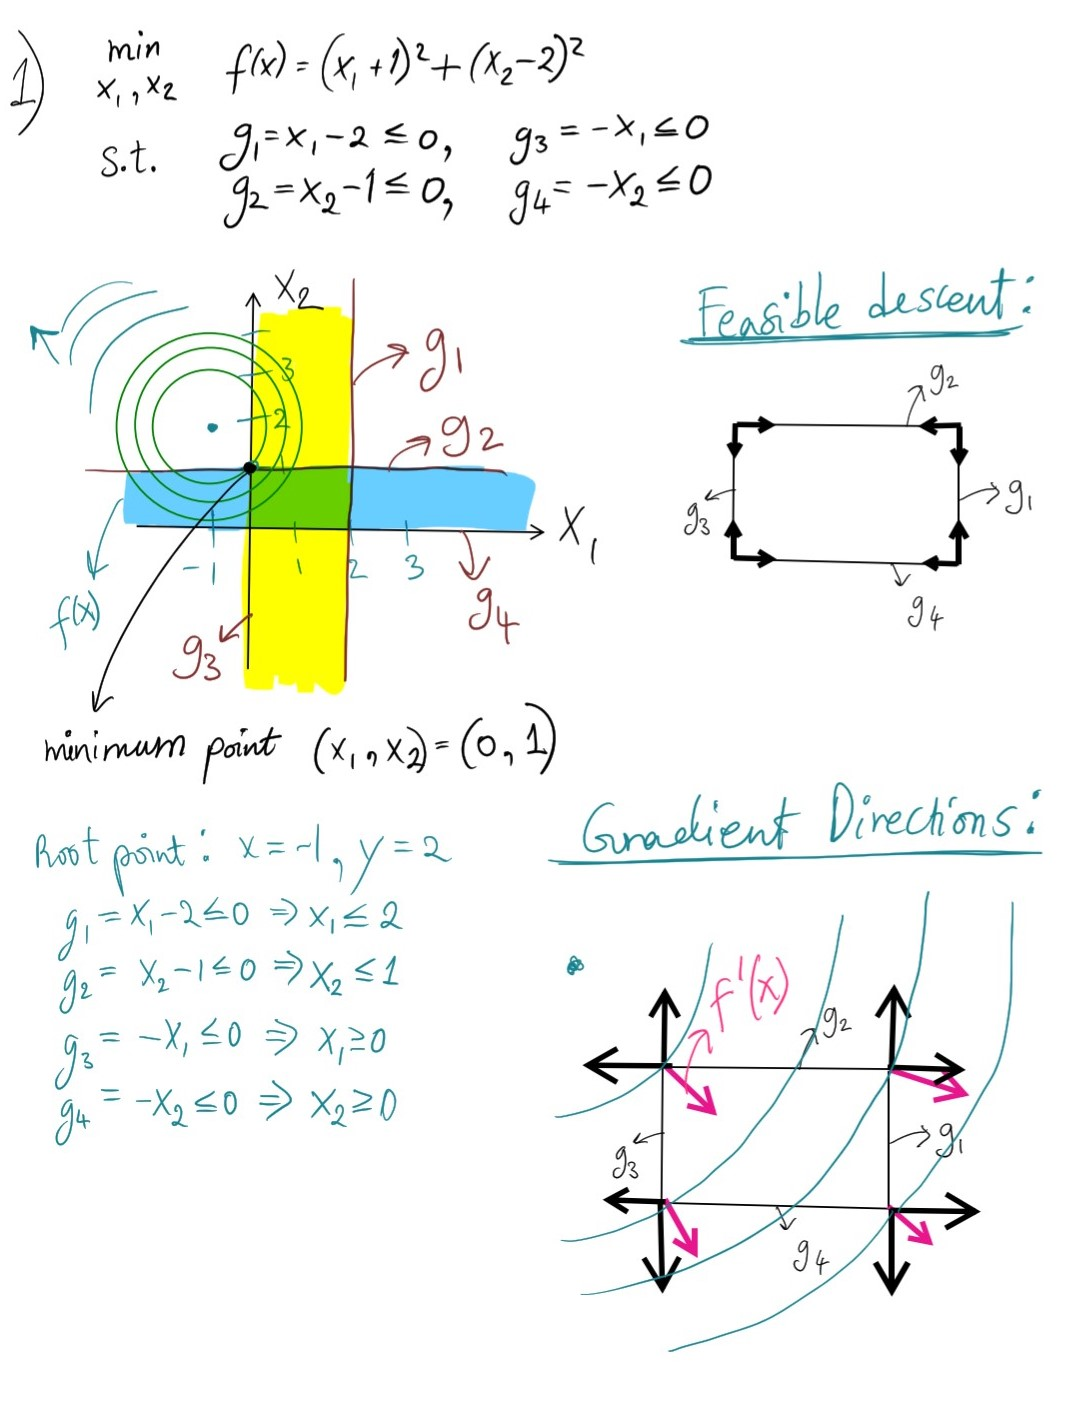

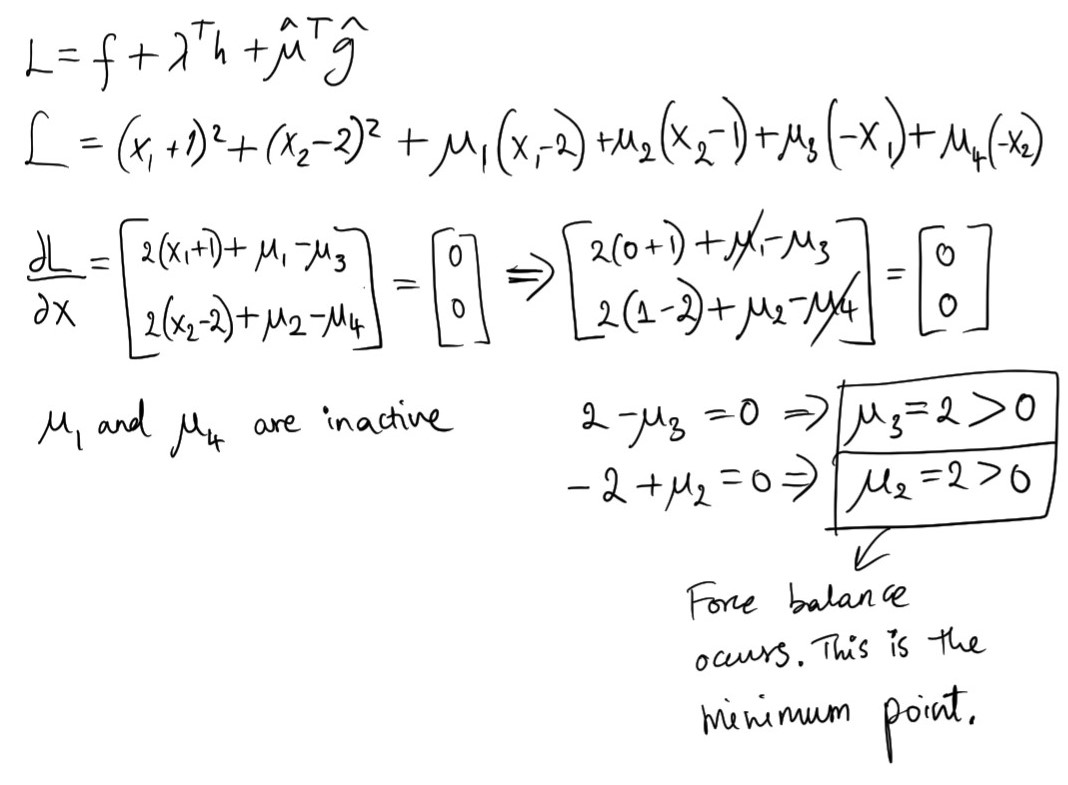

# Problem 2
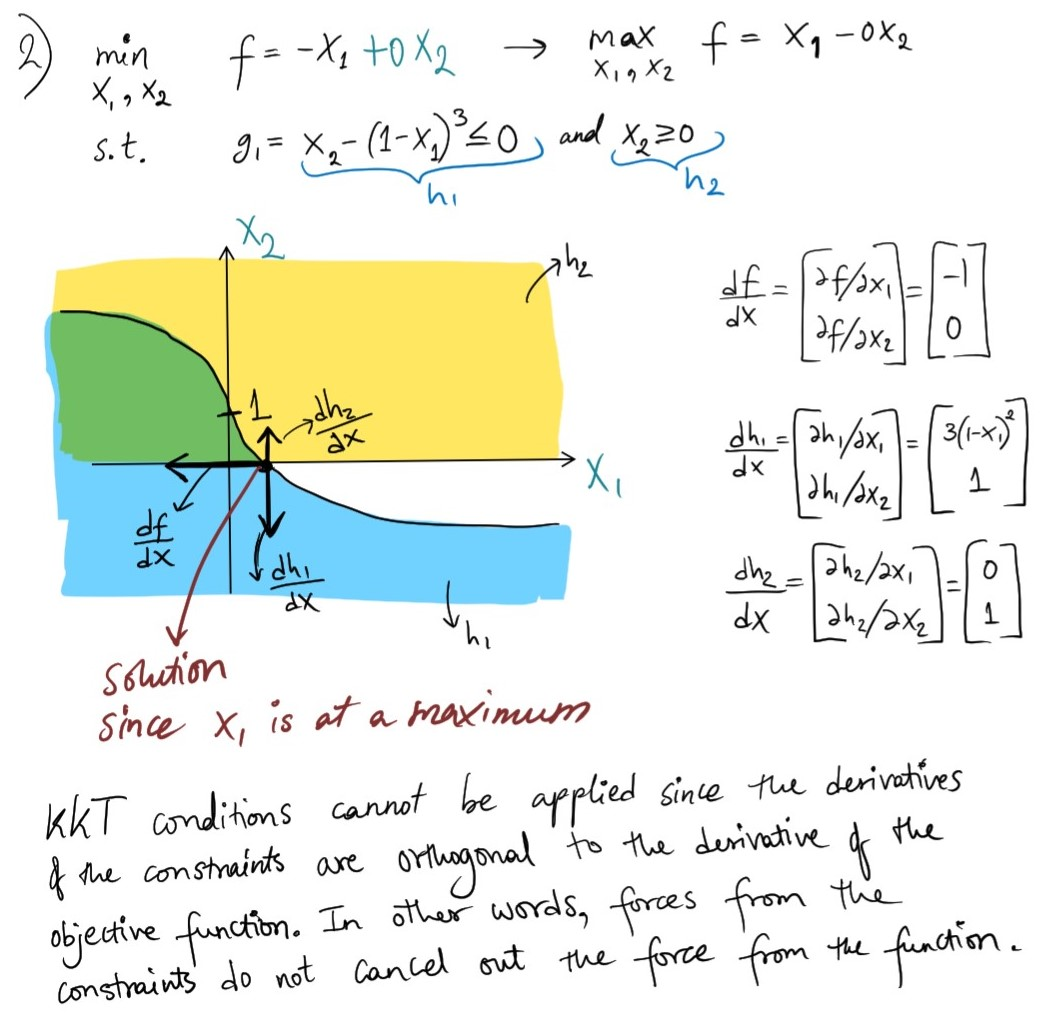

# Problem 3

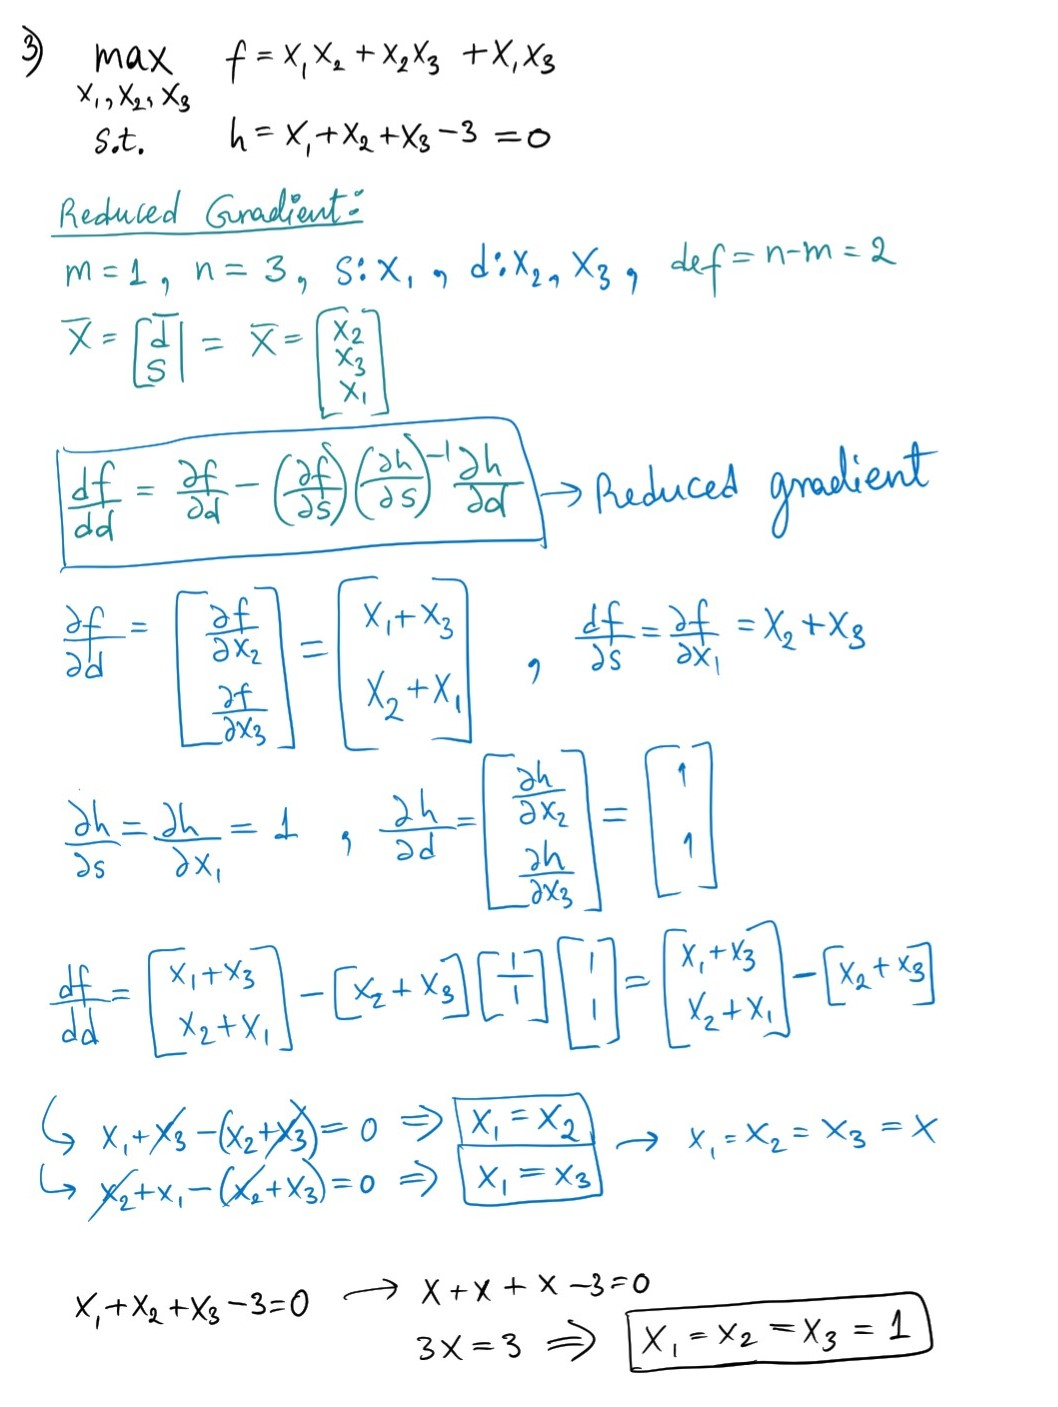

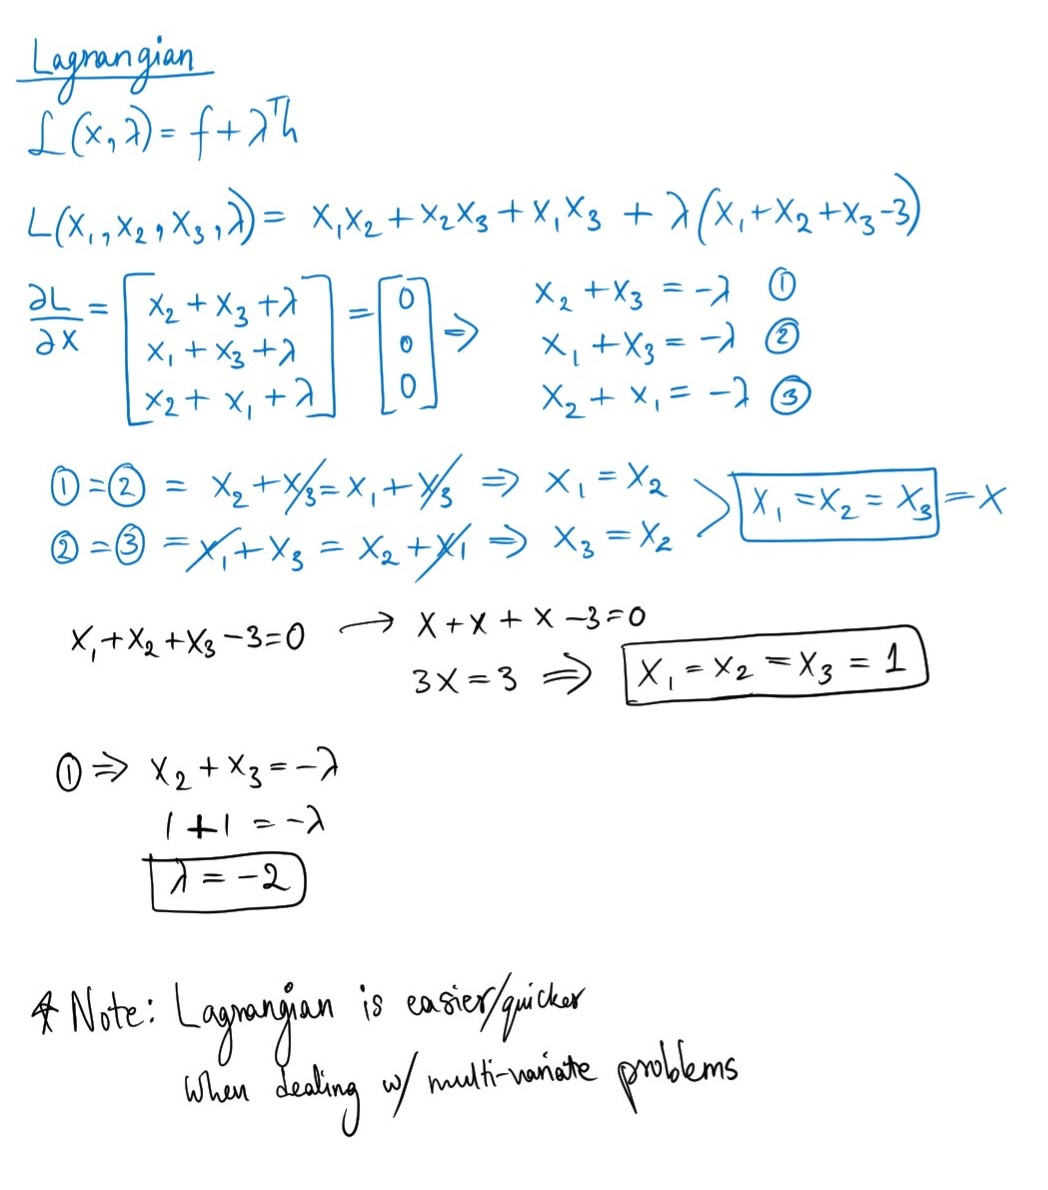

# Problem 4

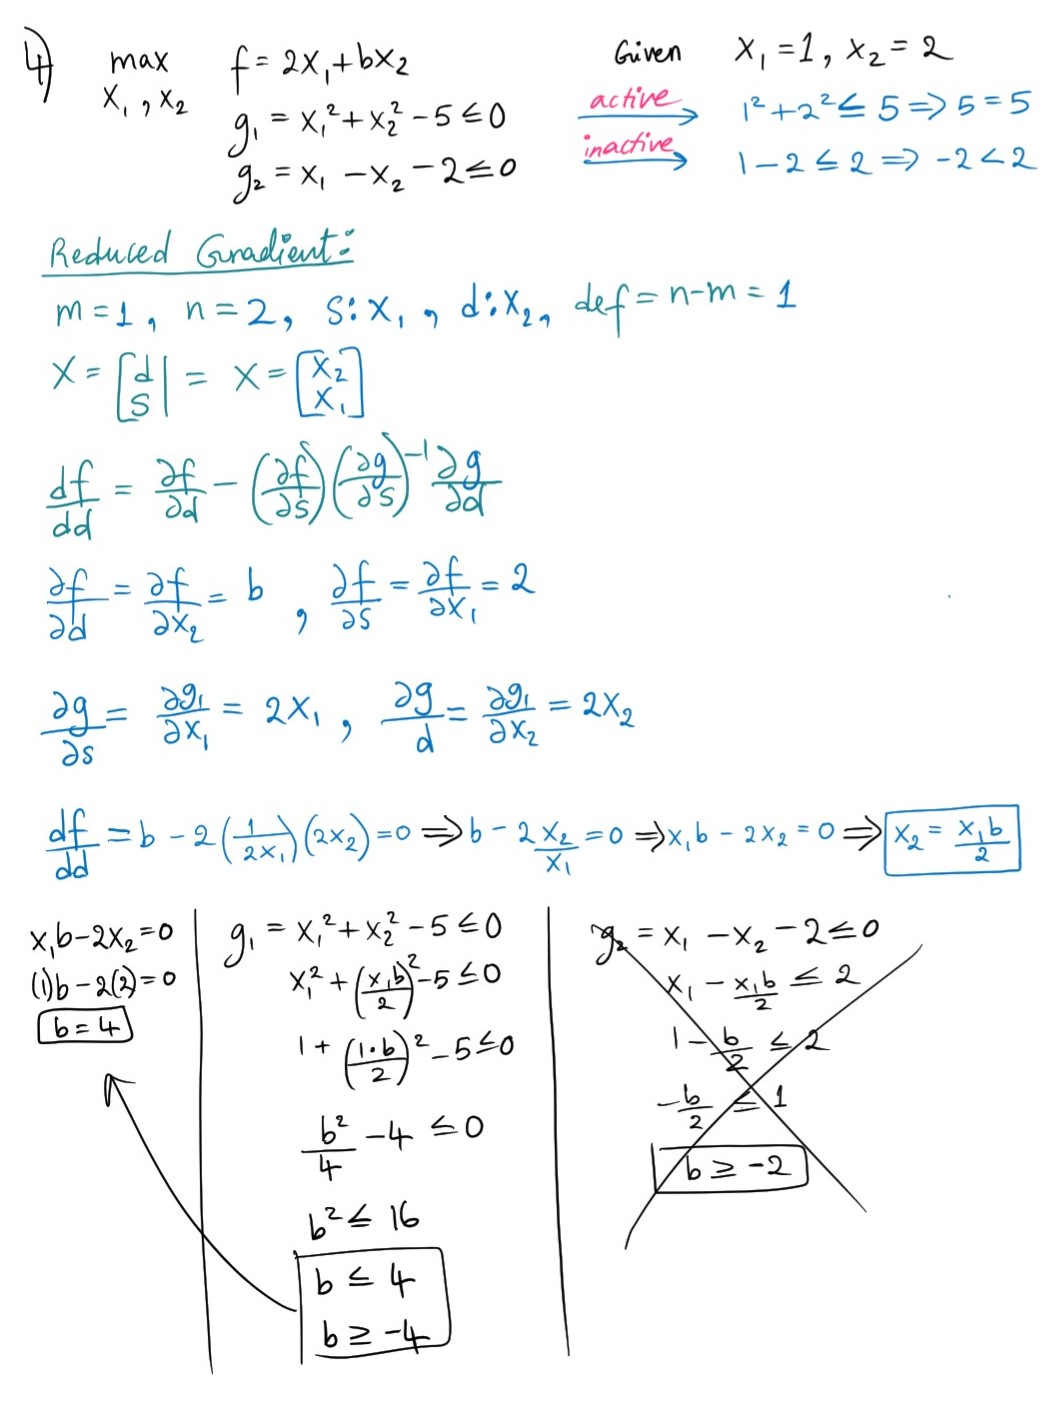

# Problem 5